In [1]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"  # Arrange GPU devices starting from 0
os.environ["CUDA_VISIBLE_DEVICES"]= "0"  # Set the GPU 2 to use

In [2]:
import tensorflow.compat.v1 as tf 

tf.enable_eager_execution(tf.ConfigProto(log_device_placement=True)) 

print(tf.add([1.0, 2.0], [3.0, 4.0])) 

2024-05-21 19:39:46.575866: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-21 19:39:46.824405: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-21 19:39:46.824441: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-21 19:39:46.825822: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-05-21 19:39:46.936280: I tensorflow/core/platform/cpu_feature_g

tf.Tensor([4. 6.], shape=(2,), dtype=float32)


2024-05-21 19:39:49.176770: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-21 19:39:49.278418: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-21 19:39:49.278690: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-21 19:39:49.280279: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-21 19:39:49.280432: I tensorflow/compile

In [3]:
from tensorflow import keras
mnist = keras.datasets.mnist
mnist.load_data()

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [4]:
((train_images, train_labels), (test_images, test_labels)) = mnist.load_data()

In [5]:
train_images.shape

(60000, 28, 28)

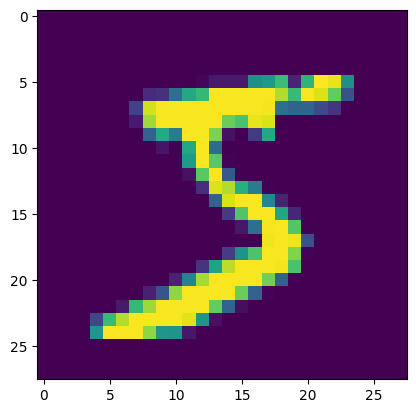

5


In [6]:
import matplotlib.pyplot as plt

plt.figure()
plt.imshow(train_images[0])
plt.show()
print(train_labels[0])

In [7]:
print(train_images.dtype)
print(train_labels.dtype)

uint8
uint8


In [8]:
print(max(train_images.reshape(-1)), min(train_images.reshape(-1)))
print(max(train_labels.reshape(-1)), min(train_labels.reshape(-1)))

255 0
9 0


In [9]:
import pandas as pd
df = pd.DataFrame({'label': train_labels.reshape(-1)})

In [10]:
df.describe()

,label
count,60000.000000
mean,4.453933
std,2.889270
min,0.000000
25%,2.000000
50%,4.000000
75%,7.000000
max,9.000000


<Axes: xlabel='label', ylabel='Count'>

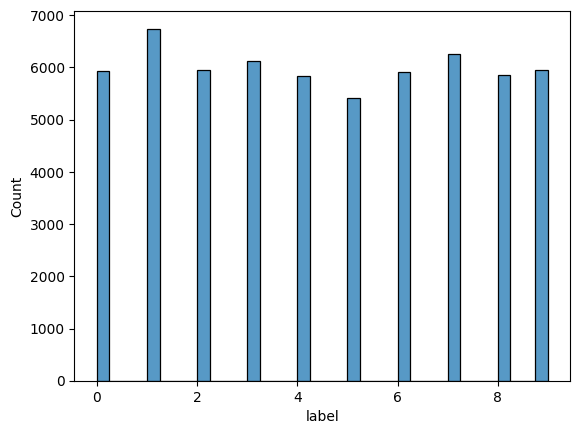

In [11]:
import seaborn as sns
sns.histplot(x="label", data=df)

In [12]:
import numpy as np
train_images = train_images.astype(np.float64)
test_images = test_images.astype(np.float64)

In [13]:
train_images.dtype

dtype('float64')

In [14]:
train_images = train_images / 255
print(max(train_images[0].reshape(-1)))

1.0


In [15]:
test_images = test_images / 255
print(max(test_images[0].reshape(-1)))

1.0


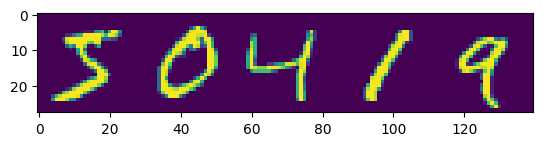

In [16]:
plt.imshow(train_images[:5].transpose((1,0,2)).reshape(28,-1))
plt.show()

In [17]:
train_images[:5].transpose(1,2,0).shape

(28, 28, 5)

[[[ 1  2]
  [ 5  6]
  [ 9 10]]

 [[ 3  4]
  [ 7  8]
  [11 12]]]
[ 1  2  5  6  9 10  3  4  7  8 11 12]


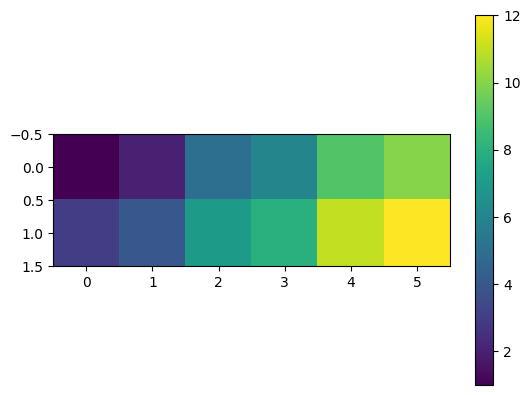

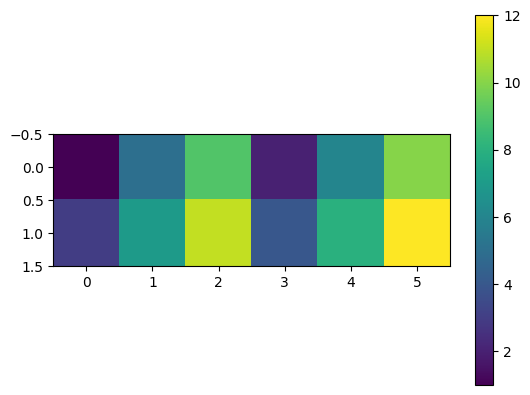

In [18]:
test = np.array([[[1,2],[3,4]],[[5,6],[7,8]],[[9,10],[11,12]]])
print(test.transpose((1,0,2)))
print(test.transpose((1,0,2)).reshape(-1))
plt.imshow(test.transpose((1,0,2)).reshape(2,-1))
plt.colorbar()
plt.show()
plt.imshow(test.transpose((1,2,0)).reshape(2,-1))
plt.colorbar()
plt.show()

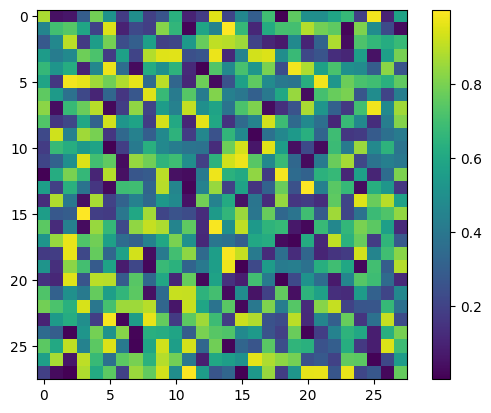

In [19]:
# print(np.random.random((28,28)))
plt.imshow(np.random.random((28,28)))
plt.colorbar()
plt.show()

<Axes: xlabel='value', ylabel='Count'>

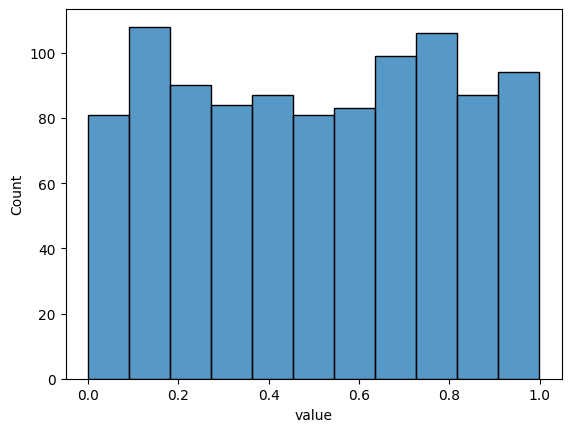

In [20]:
tmp = pd.DataFrame({"value": np.random.random((1000))})
sns.histplot(x="value",data=tmp)

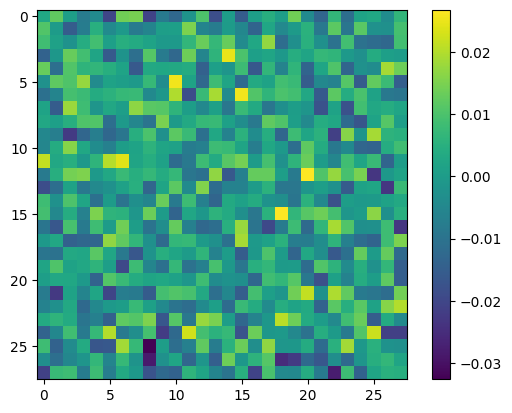

In [21]:
plt.imshow(np.random.normal(0.0,0.01,(28,28)))
plt.colorbar()
plt.show()

<Axes: xlabel='value', ylabel='Count'>

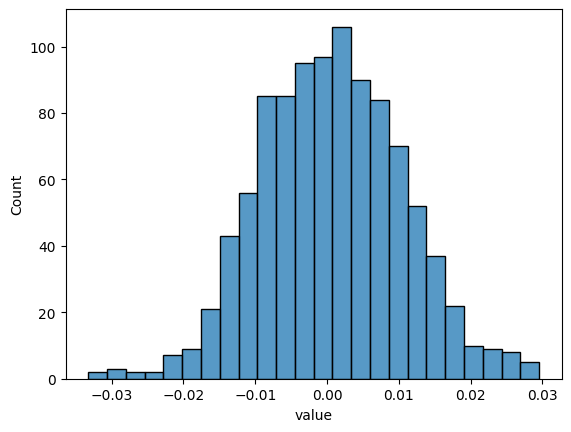

In [22]:
tmp = pd.DataFrame({"value": np.random.normal(0,0.01,(1000))})
sns.histplot(x="value",data=tmp)

In [23]:
noize_image = train_images + np.random.normal(0.5,0.1,train_images.shape)

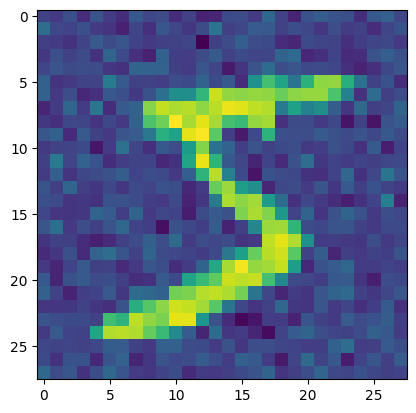

In [24]:
plt.imshow(noize_image[0])
plt.show()

In [25]:
print(max(noize_image.reshape(-1)))
print(min(noize_image.reshape(-1)))

2.009783545857686
-0.029079408153546038


In [26]:
noize_image[noize_image>1.0] = 1.0
noize_image[noize_image<0.0] = 0.0

print(max(noize_image.reshape(-1)))
print(min(noize_image.reshape(-1)))

1.0
0.0


In [27]:
test_noize_image = test_images + np.random.normal(0.5,0.1,test_images.shape)
test_noize_image[test_noize_image>1.0] = 1.0
test_noize_image[test_noize_image<0.0] = 0.0

print(max(test_noize_image.reshape(-1)))
print(min(test_noize_image.reshape(-1)))

1.0
0.0038017423620342328


In [28]:
print(max(test_images.reshape(-1)))
print(min(test_images.reshape(-1)))

1.0
0.0


In [29]:
from keras.utils import to_categorical
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)
print(train_labels[:3])

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [30]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
tf.config.list_physical_devices('GPU')

Num GPUs Available:  1


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [37]:
# tensorflow device 확인
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

2024-05-21 19:46:53.107397: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-21 19:46:53.108707: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-21 19:46:53.109373: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-21 19:46:53.110981: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-21 19:46:53.111039: I tensorflow/core/co

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 9138737934138371000
 xla_global_id: -1,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 5833228288
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 15712081914022261948
 physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 4060, pci bus id: 0000:01:00.0, compute capability: 8.9"
 xla_global_id: 416903419]

In [32]:
tf.debugging.set_log_device_placement(True)

try:
  # 유효하지 않은 GPU 장치를 명시
  with tf.device('/device:GPU:2'):
    a = tf.constant([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
    b = tf.constant([[1.0, 2.0], [3.0, 4.0], [5.0, 6.0]])
    c = tf.matmul(a, b)
    print(c)
except RuntimeError as e:
  print(e)


tf.Tensor(
[[22. 28.]
 [49. 64.]], shape=(2, 2), dtype=float32)


In [33]:
from keras.layers import Conv2D
from keras.layers import Dense, Input, Flatten
from keras.models import Model

inputs = Input(shape=(28,28,1))
h1 = Conv2D(10,(3,3),activation='relu')(inputs)
h2 = Conv2D(20,(3,3),activation='relu')(h1)
h3 = Flatten()(h2)
h4 = Dense(10, activation = "softmax")(h3)
model = Model(inputs,h4)


In [34]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 10)        100       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 20)        1820      
                                                                 
 flatten (Flatten)           (None, 11520)             0         
                                                                 
 dense (Dense)               (None, 10)                115210    
                                                                 
Total params: 117130 (457.54 KB)
Trainable params: 117130 (457.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [35]:
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [36]:
hist = model.fit(noize_image, train_labels, validation_data=(test_noize_image, test_labels), epochs=5, verbose=2)

Epoch 1/5


2024-05-21 19:40:55.916512: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8700
2024-05-21 19:40:56.184567: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-05-21 19:40:56.413887: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7fc930df4b00 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-05-21 19:40:56.413926: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 4060, Compute Capability 8.9
2024-05-21 19:40:56.433197: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-05-21 19:40:56.571460: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-05-21 19:40:56.653648: I ./tensorflow/compiler/jit/device_comp

1875/1875 - 12s - loss: 0.2486 - accuracy: 0.9254 - val_loss: 0.0979 - val_accuracy: 0.9686 - 12s/epoch - 7ms/step
Epoch 2/5
1875/1875 - 10s - loss: 0.0876 - accuracy: 0.9735 - val_loss: 0.0779 - val_accuracy: 0.9752 - 10s/epoch - 5ms/step
Epoch 3/5
1875/1875 - 10s - loss: 0.0638 - accuracy: 0.9801 - val_loss: 0.0669 - val_accuracy: 0.9789 - 10s/epoch - 5ms/step
Epoch 4/5
1875/1875 - 11s - loss: 0.0467 - accuracy: 0.9858 - val_loss: 0.0737 - val_accuracy: 0.9764 - 11s/epoch - 6ms/step
Epoch 5/5
1875/1875 - 11s - loss: 0.0367 - accuracy: 0.9885 - val_loss: 0.0738 - val_accuracy: 0.9787 - 11s/epoch - 6ms/step


1/1 [==============================] - 0s 385ms/step


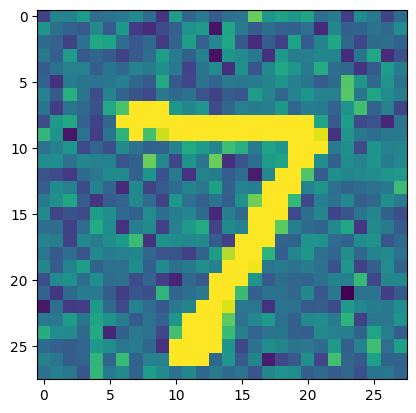

[[4.3623389e-14 1.3013816e-15 6.6914763e-10 8.8029310e-06 4.3648733e-16
  5.6245598e-12 3.2177739e-20 9.9999118e-01 2.9267205e-10 2.6554394e-09]]


In [42]:
res = model.predict(test_noize_image[:1])
plt.imshow(test_noize_image[0])
plt.show()
print(res)